# Manipulating Time Series Data in Python

## Working with Time Series in Pandas

### Your first time series

In [1]:
import pandas as pd

In [13]:
# Create the range of dates here
seven_days = pd.date_range(start='2017-1-1', periods=7)

# Iterate over the dates and print the number and name of the weekday
for day in seven_days:
    print(day.dayofweek, day.day_name())

6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


### Create a time series of air quality data

In [17]:
import matplotlib.pyplot as plt

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


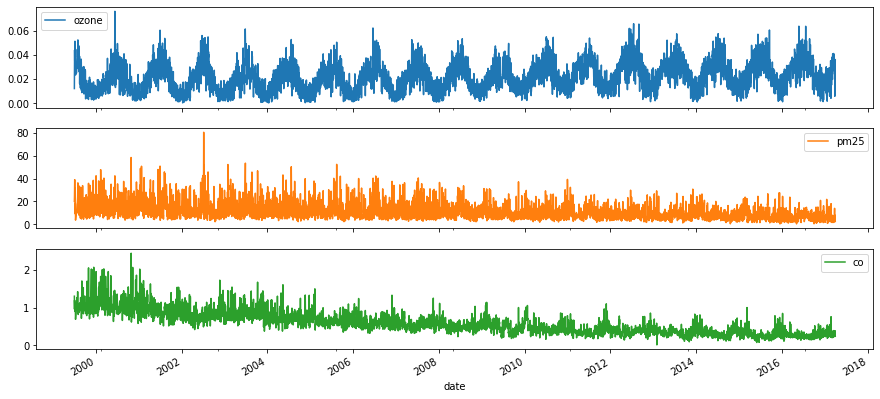

In [21]:
data = pd.read_csv('nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index
data.set_index('date', inplace=True)

# Inspect data 
print(data.info())

# Plot data
data.plot(subplots=True, figsize=(15,7))
plt.show()

### Compare annual stock price trends

In [47]:
yahoo = pd.read_csv('yahoo.csv', parse_dates=['date'])

In [48]:
yahoo.set_index('date', inplace=True)

In [49]:
yahoo.head()

,price
date,
2013-01-02,20.08
2013-01-03,19.78
2013-01-04,19.86
2013-01-07,19.40
2013-01-08,19.66


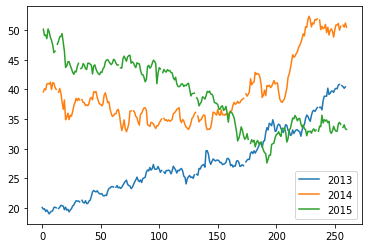

In [53]:
# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

### Set and change time series frequency

In [67]:
co = pd.read_csv('co_cities.csv', parse_dates=['date'])

In [68]:
co.set_index('date', inplace=True)

In [69]:
co.head()

,Chicago,Los Angeles,New York
date,,,
2005-01-01,0.317763,0.777657,0.639830
2005-01-03,0.520833,0.349547,0.969572
2005-01-04,0.477083,0.626630,0.905208
2005-01-05,0.348822,0.613814,0.769176
2005-01-06,0.572917,0.792596,0.815761


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


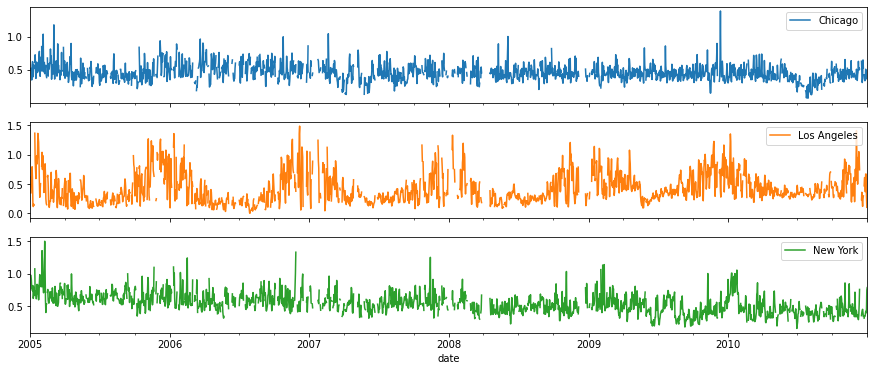

In [70]:
# Inspect data
print(co.info())

# Set the frequency to calendar daily
co = co.asfreq(freq='D')

# Plot the data
co.plot(subplots=True, figsize=(15,6))
plt.show()

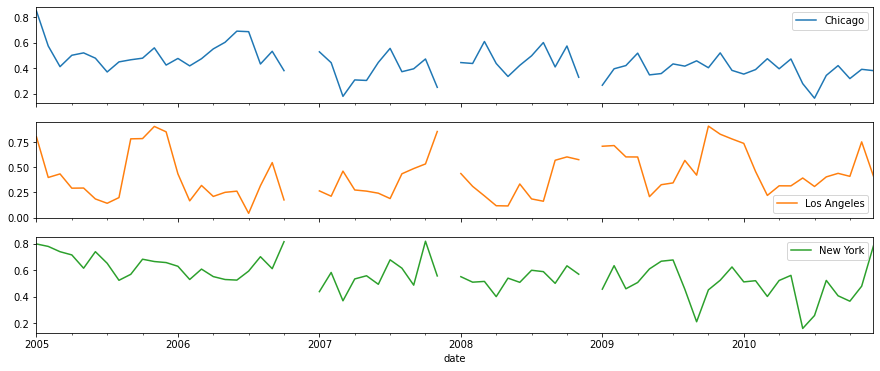

In [71]:
# Set frequency to monthly
co = co.asfreq(freq='M')

# Plot the data
co.plot(subplots=True, figsize=(15,6))
plt.show()

### Shifting stock prices across time

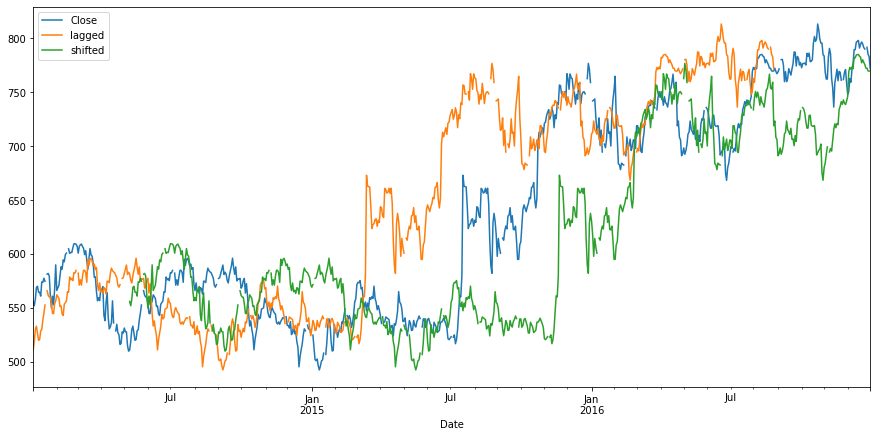

In [73]:
# Import data here
google = pd.read_csv('google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq(freq='B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90) # 90 business days into past
google['shifted'] = google.Close.shift(periods=90) # 90 business days into future

# Plot the google price series
google.plot(figsize=(15,7))
plt.show()

In [76]:
google.head()

,Close,lagged,shifted
Date,,,
2014-01-02,556.00,511.00,NaN
2014-01-03,551.95,518.73,NaN
2014-01-06,558.10,529.92,NaN
2014-01-07,568.86,533.09,NaN
2014-01-08,570.04,526.65,NaN


In [77]:
google.tail()

,Close,lagged,shifted
Date,,,
2016-12-26,NaN,NaN,772.15
2016-12-27,791.55,NaN,772.08
2016-12-28,785.05,NaN,769.64
2016-12-29,782.79,NaN,769.41
2016-12-30,771.82,NaN,769.54


### Calculating stock price changes 

In [78]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(periods=30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(periods=30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


### Plotting multi-period returns

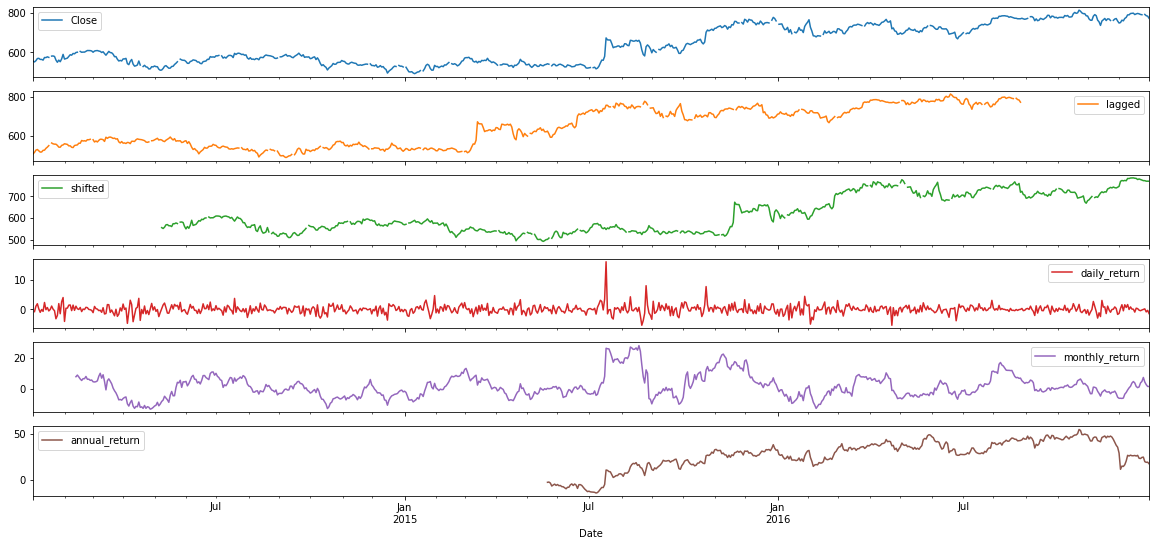

In [83]:
# Create daily_return
google['daily_return'] = google.Close.pct_change(periods=1) * 100

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(periods=30) * 100

# Create annual_return
google['annual_return'] = google.Close.pct_change(periods=360) * 100

# Plot the result
google.plot(subplots=True, figsize=(20,9))
plt.show()